Инсталирање на пакетот GWpy кој се користи за обработка на податоци од доменот на гравитационата астрофизика

In [1]:
! pip install -q 'gwpy==3.0.4'

In [2]:
import gwpy
print(gwpy.__version__)

3.0.4


1. Анализа на GW150914 (BBH сигнал)

In [3]:
# event_gps funkcijata ovozmozhuva naogjanje 
# na gps pochetnata sekunda kako se detektira nastanot
from gwosc.datasets import event_gps
gps_1 = event_gps('GW150914')
print(gps_1)

1126259462.4


In [4]:
segment_1 = (int(gps_1)-50, int(gps_1)+50)
print(segment_1)

(1126259412, 1126259512)


In [5]:
# vchituvanje na podatocite od dvata LIGO detektori
# Hanford - 'H1'  ;  Livingston - 'L1'
from gwpy.timeseries import TimeSeries
hdata_1 = TimeSeries.fetch_open_data('H1', *segment_1, verbose=True)
print(hdata_1)

Fetched 1 URLs from gwosc.org for [1126259412 .. 1126259512))
Reading data... [Done]
TimeSeries([ 2.07608295e-19,  1.93993729e-19,  1.55286198e-19,
            ..., -1.81311385e-19, -1.72723836e-19,
            -1.95447772e-19]
           unit: dimensionless,
           t0: 1126259412.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [6]:
ldata_1 = TimeSeries.fetch_open_data('L1', *segment_1, verbose=True)
print(ldata_1)
# cache=True argument za zachuvuvanje lokalno

Fetched 1 URLs from gwosc.org for [1126259412 .. 1126259512))
Reading data... [Done]
TimeSeries([-1.20774146e-18, -1.20854248e-18, -1.16616474e-18,
            ..., -1.10640150e-18, -1.09233355e-18,
            -1.08785797e-18]
           unit: dimensionless,
           t0: 1126259412.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


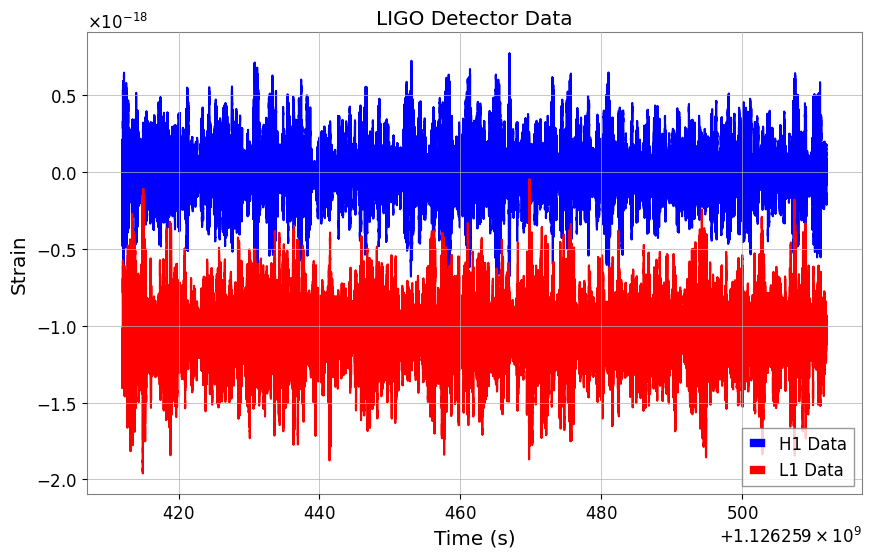

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(hdata_1.times, hdata_1.value, label='H1 Data', color='b')
plt.plot(ldata_1.times, ldata_1.value, label='L1 Data', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('LIGO Detector Data')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# pred da se koristi FFT za pretvoranje vo frekventen domen se aplicira window f-ja bidejkji podatocite se neperiodichni
from scipy.signal import get_window
hwindow_1 = get_window('hann', hdata_1.size)
hwin_1 = hdata_1 * hwindow_1

In [9]:
hfftamp_1 = hwin_1.fft().abs()

In [10]:
lwindow_1 = get_window('hann', ldata_1.size)
lwin_1 = ldata_1 * lwindow_1

In [11]:
lfftamp_1 = lwin_1.fft().abs()

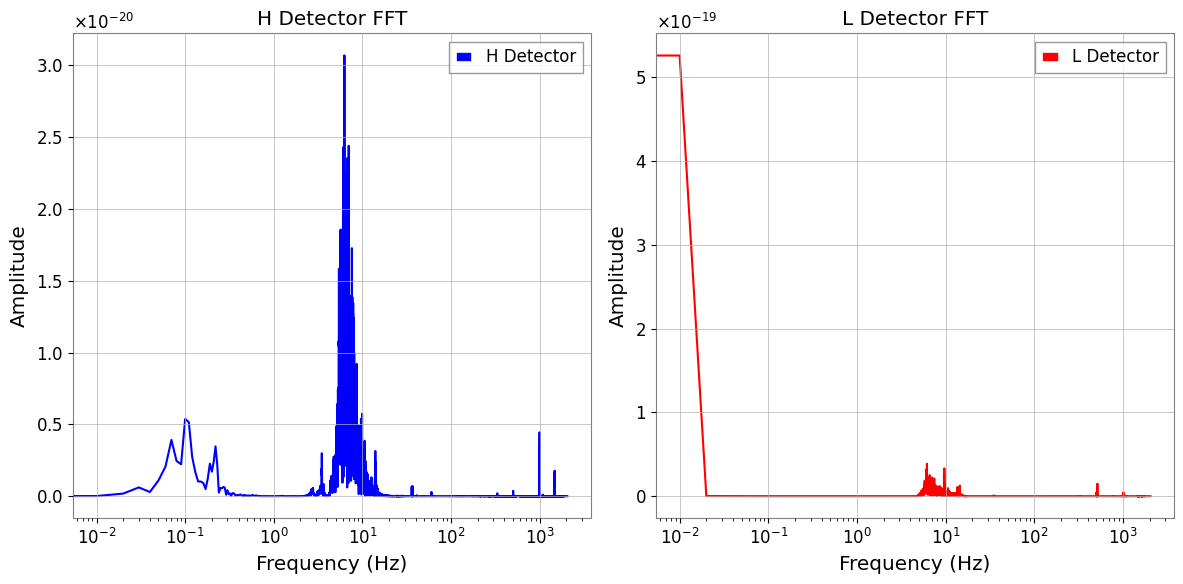

In [12]:
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].semilogx(hfftamp_1.frequencies.value, hfftamp_1.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('H Detector FFT')
axs[0].grid(True)

axs[1].semilogx(lfftamp_1.frequencies.value, lfftamp_1.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('L Detector FFT')
axs[1].grid(True)

axs[0].legend()
axs[1].legend()

plt.tight_layout()

plt.show()

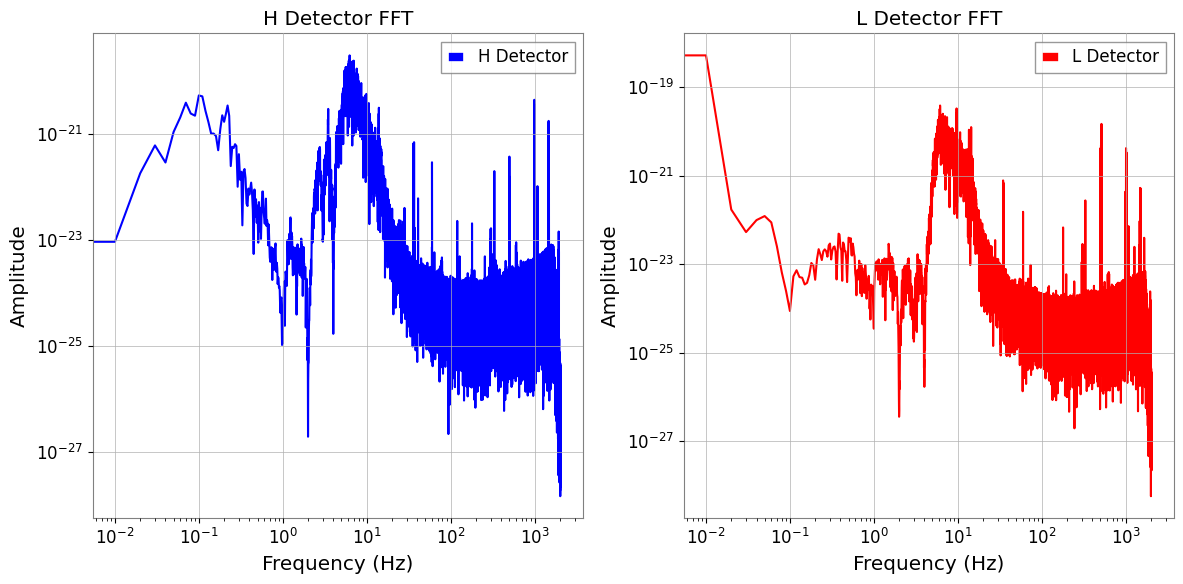

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].loglog(hfftamp_1.frequencies.value, hfftamp_1.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('H Detector FFT')
axs[0].grid(True)

axs[1].loglog(lfftamp_1.frequencies.value, lfftamp_1.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('L Detector FFT')
axs[1].grid(True)

axs[0].legend()
axs[1].legend()

plt.tight_layout()

plt.show()

In [14]:
hasd_1 = hdata_1.asd(fftlength=2, method="median")
lasd_1 = ldata_1.asd(fftlength=2, method="median")

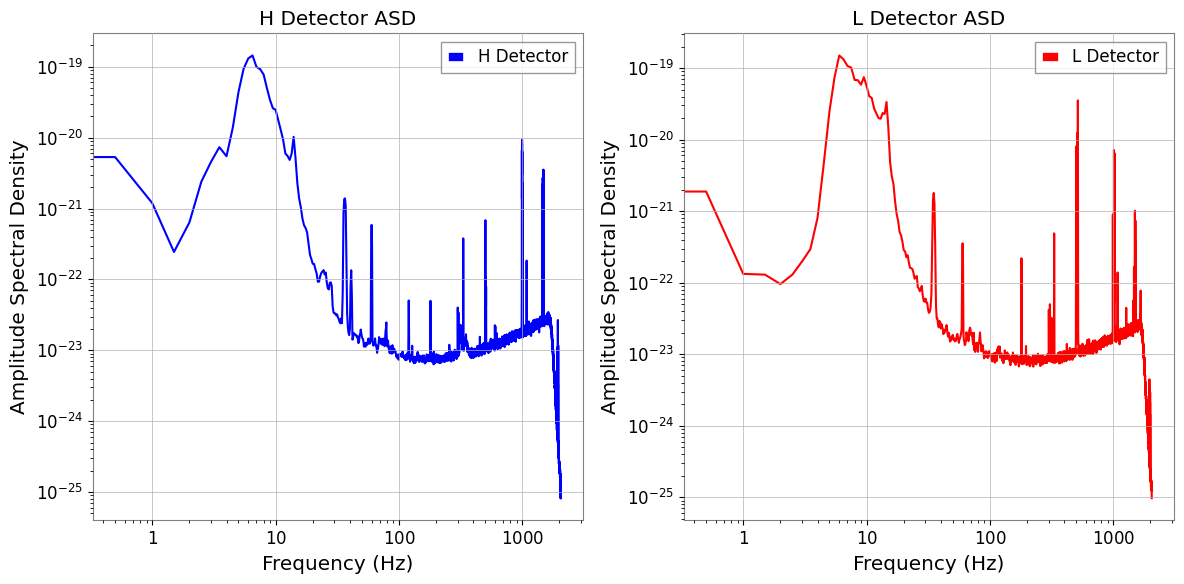

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].loglog(hasd_1.frequencies.value, hasd_1.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)

axs[1].loglog(lasd_1.frequencies.value, lasd_1.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)

axs[0].legend()
axs[1].legend()

plt.tight_layout()

plt.show()

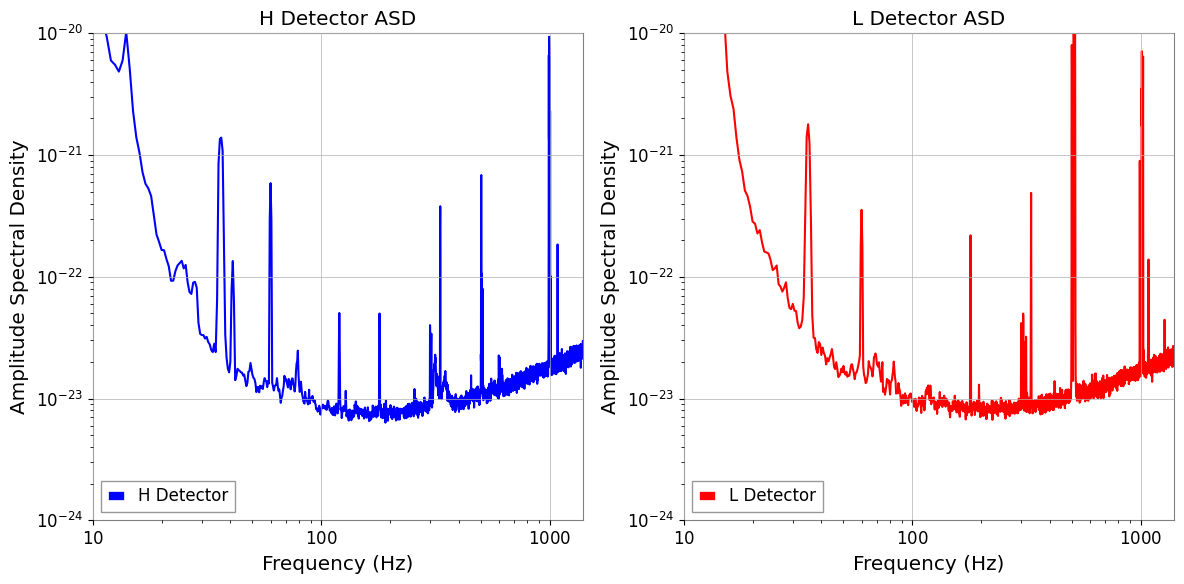

In [16]:
# se zumira vo frekv. opseg on interes
# nad seizmichkiot shum na 10Hz i pod Najkvistovata frekv.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].loglog(hasd_1.frequencies.value, hasd_1.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(10, 1400)
axs[0].set_ylim(1e-24, 1e-20)

axs[1].loglog(lasd_1.frequencies.value, lasd_1.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(10, 1400)
axs[1].set_ylim(1e-24, 1e-20)

plt.tight_layout()

plt.show()

In [17]:
# sega da se razgleda ASD ako se zeme pogolem segment
hdata_1_2 = TimeSeries.fetch_open_data('H1', int(gps_1)-512, int(gps_1)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]


In [18]:
ldata_1_2 = TimeSeries.fetch_open_data('L1', int(gps_1)-512, int(gps_1)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1126258950 .. 1126259974))
Reading data... [Done]


In [19]:
hasd_1_2 = hdata_1_2.asd(fftlength=4, method="median")
lasd_1_2 = ldata_1_2.asd(fftlength=4, method="median")

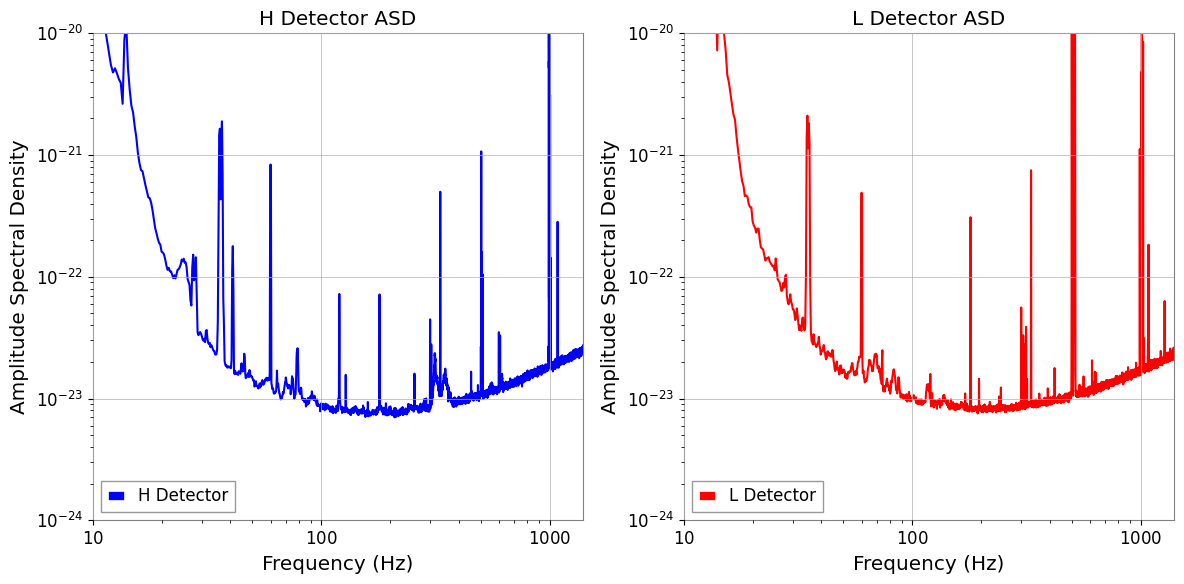

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].loglog(hasd_1_2.frequencies.value, hasd_1_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(10, 1400)
axs[0].set_ylim(1e-24, 1e-20)

axs[1].loglog(lasd_1_2.frequencies.value, lasd_1_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(10, 1400)
axs[1].set_ylim(1e-24, 1e-20)

plt.tight_layout()

plt.show()

Спектрограми

In [21]:
deltat = 0.000244140625

In [22]:
segment_new1 = (gps_1-5,gps_1+5)

In [23]:
strain_H1 = TimeSeries.fetch_open_data('H1', *segment_new1, verbose=True)

Fetched 1 URLs from gwosc.org for [1126259457 .. 1126259468))
Reading data... [Done]


In [24]:
fs = 4096

In [25]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

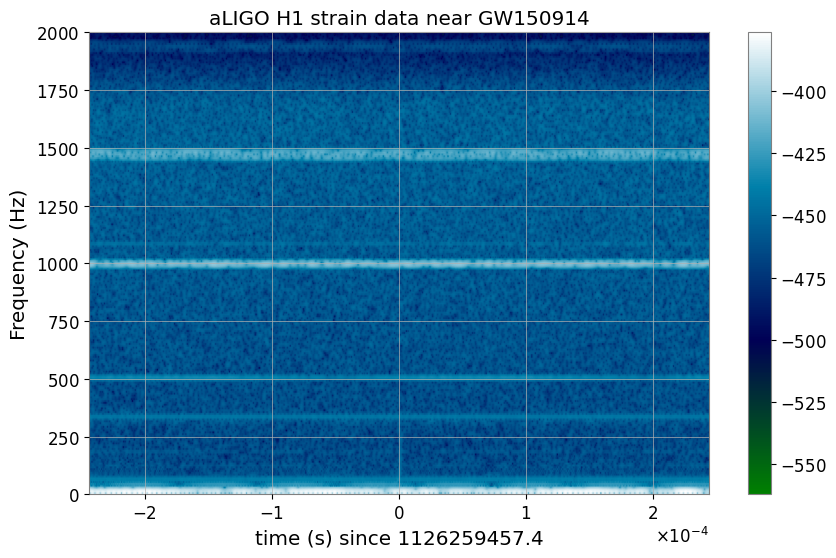

In [26]:
plt.figure(figsize=(10,6))
spec_H, freqs, bins, im = plt.specgram(strain_H1, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_1-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO H1 strain data near GW150914')
plt.show()

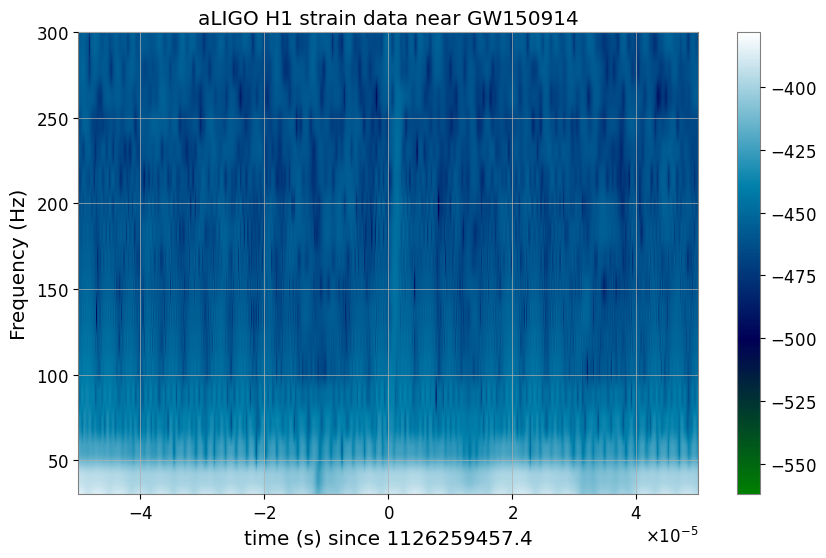

In [27]:
NFFT = int(fs/16.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_H, freqs, bins, im = plt.specgram(strain_H1, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_1-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5e-4, 0.5e-4, 30, 300])
plt.title('aLIGO H1 strain data near GW150914')
plt.show()

In [72]:
strain_L1 = TimeSeries.fetch_open_data('L1', *segment_new1, verbose=True)

Fetched 1 URLs from gwosc.org for [1126259457 .. 1126259468))
Reading data... [Done]


In [73]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

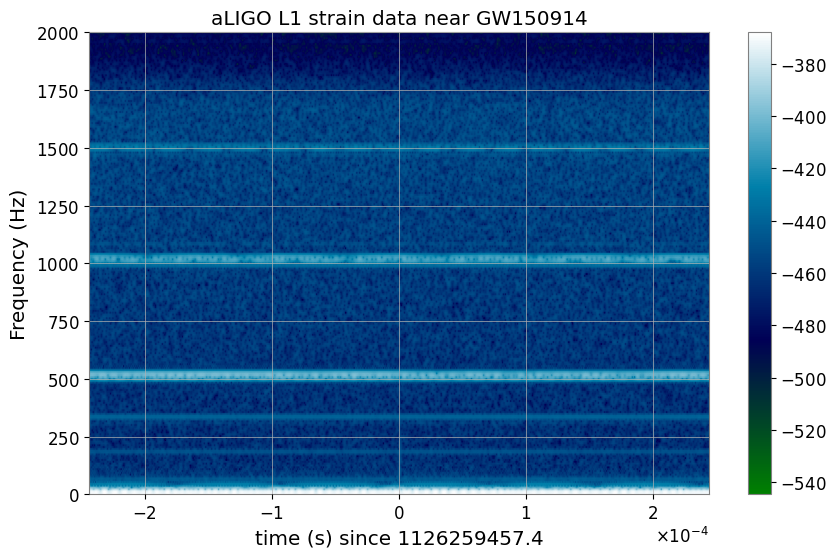

In [74]:
plt.figure(figsize=(10,6))
spec_L, freqs, bins, im = plt.specgram(strain_L1, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_1-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO L1 strain data near GW150914')
plt.show()

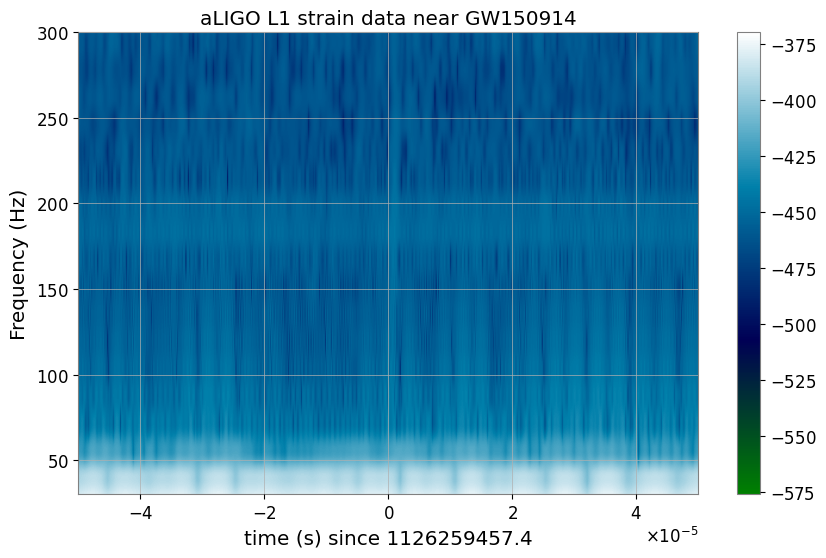

In [80]:
NFFT = int(fs/16.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_L, freqs, bins, im = plt.specgram(strain_L1, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_1-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5e-4, 0.5e-4, 30, 300])
plt.title('aLIGO L1 strain data near GW150914')
plt.show()

2. Анализа на GW170817 (BNS сигнал)

In [28]:
gps_2 = event_gps('GW170817')
print(gps_2)

1187008882.4


In [29]:
segment_2 = (int(gps_2)-50, int(gps_2)+50)
print(segment_2)

(1187008832, 1187008932)


In [30]:
hdata_2 = TimeSeries.fetch_open_data('H1', *segment_2, verbose=True)
print(hdata_2)

Fetched 1 URLs from gwosc.org for [1187008832 .. 1187008932))
Reading data... [Done]
TimeSeries([-8.06635617e-19, -8.00559804e-19, -7.96361919e-19,
            ..., -7.30700002e-19, -7.40245201e-19,
            -7.57109667e-19]
           unit: dimensionless,
           t0: 1187008832.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [31]:
ldata_2 = TimeSeries.fetch_open_data('L1', *segment_2, verbose=True)
print(ldata_2)

Fetched 1 URLs from gwosc.org for [1187008832 .. 1187008932))
Reading data... [Done]
TimeSeries([-1.51915090e-20, -1.26643644e-20, -9.05546809e-21,
            ..., -1.04365486e-19, -1.09374318e-19,
            -1.08023827e-19]
           unit: dimensionless,
           t0: 1187008832.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [32]:
vdata_2 = TimeSeries.fetch_open_data('V1', *segment_2, verbose=True)
print(vdata_2)

Fetched 1 URLs from gwosc.org for [1187008832 .. 1187008932))
Reading data... [Done]
TimeSeries([ 8.55359386e-19,  8.10858506e-19,  7.81107135e-19,
            ..., -1.50754748e-19, -1.32211986e-19,
            -1.46681178e-19]
           unit: dimensionless,
           t0: 1187008832.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


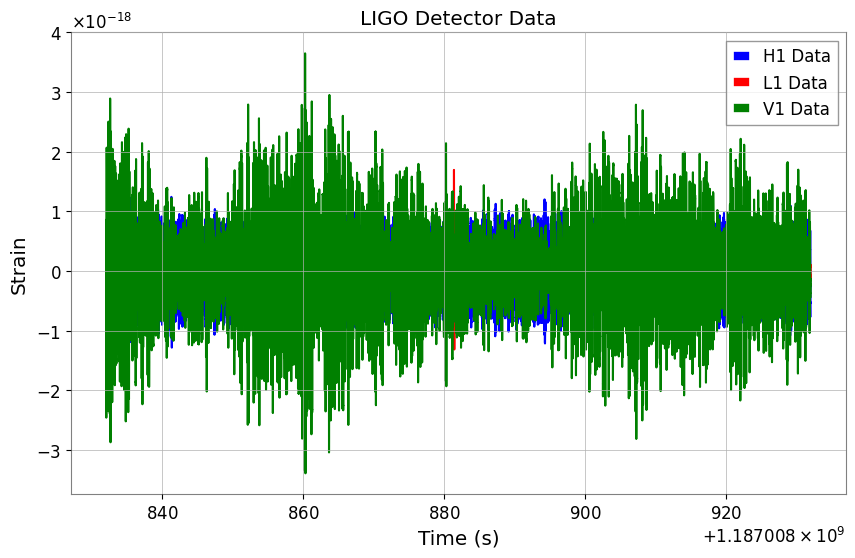

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(hdata_2.times, hdata_2.value, label='H1 Data', color='b')
plt.plot(ldata_2.times, ldata_2.value, label='L1 Data', color='r')
plt.plot(vdata_2.times, vdata_2.value, label='V1 Data', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('LIGO Detector Data')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
hwindow_2 = get_window('hann', hdata_2.size)
hwin_2 = hdata_2 * hwindow_2

In [35]:
hfftamp_2 = hwin_2.fft().abs()

In [36]:
lwindow_2 = get_window('hann', ldata_2.size)
lwin_2 = ldata_2 * lwindow_2

In [37]:
lfftamp_2 = lwin_2.fft().abs()

In [38]:
vwindow_2 = get_window('hann', vdata_2.size)
vwin_2 = vdata_2 * vwindow_2

In [39]:
vfftamp_2 = vwin_2.fft().abs()

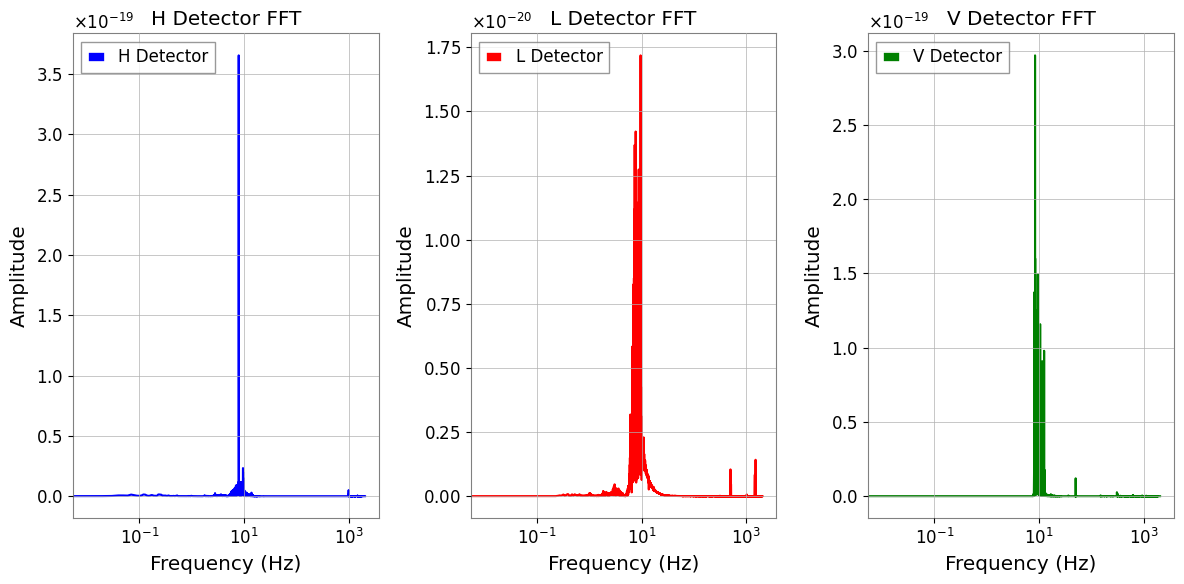

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].semilogx(hfftamp_2.frequencies.value, hfftamp_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('H Detector FFT')
axs[0].grid(True)

axs[1].semilogx(lfftamp_2.frequencies.value, lfftamp_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('L Detector FFT')
axs[1].grid(True)

axs[2].semilogx(vfftamp_2.frequencies.value, vfftamp_2.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('V Detector FFT')
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()

plt.show()

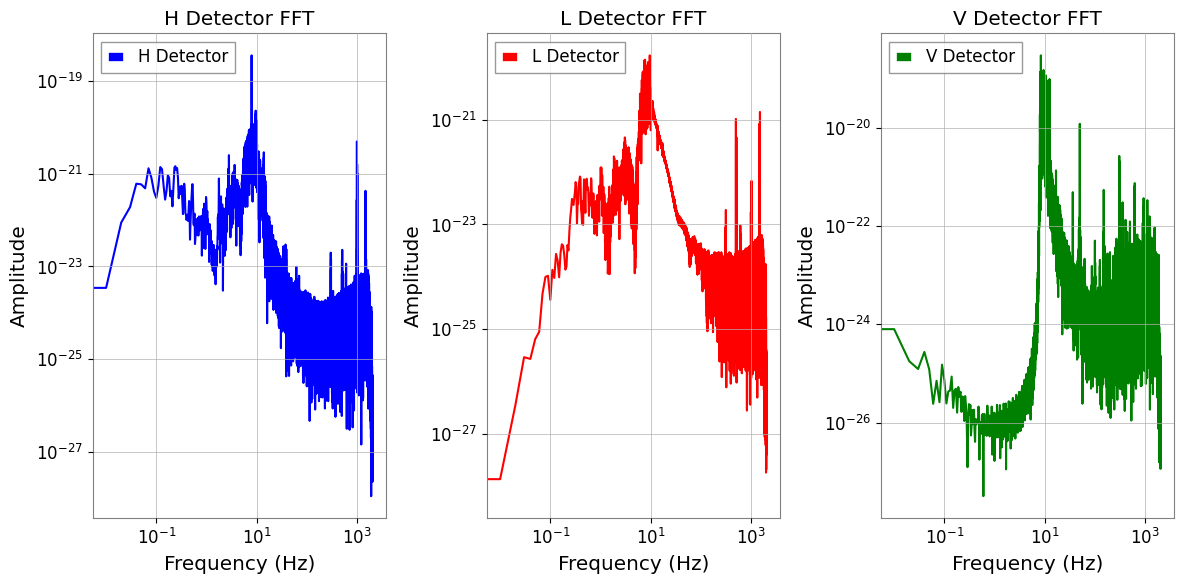

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hfftamp_2.frequencies.value, hfftamp_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('H Detector FFT')
axs[0].grid(True)

axs[1].loglog(lfftamp_2.frequencies.value, lfftamp_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('L Detector FFT')
axs[1].grid(True)

axs[2].loglog(vfftamp_2.frequencies.value, vfftamp_2.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('V Detector FFT')
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()

plt.show()

In [42]:
hasd_2 = hdata_2.asd(fftlength=2, method="median")
lasd_2 = ldata_2.asd(fftlength=2, method="median")
vasd_2 = vdata_2.asd(fftlength=2, method="median")

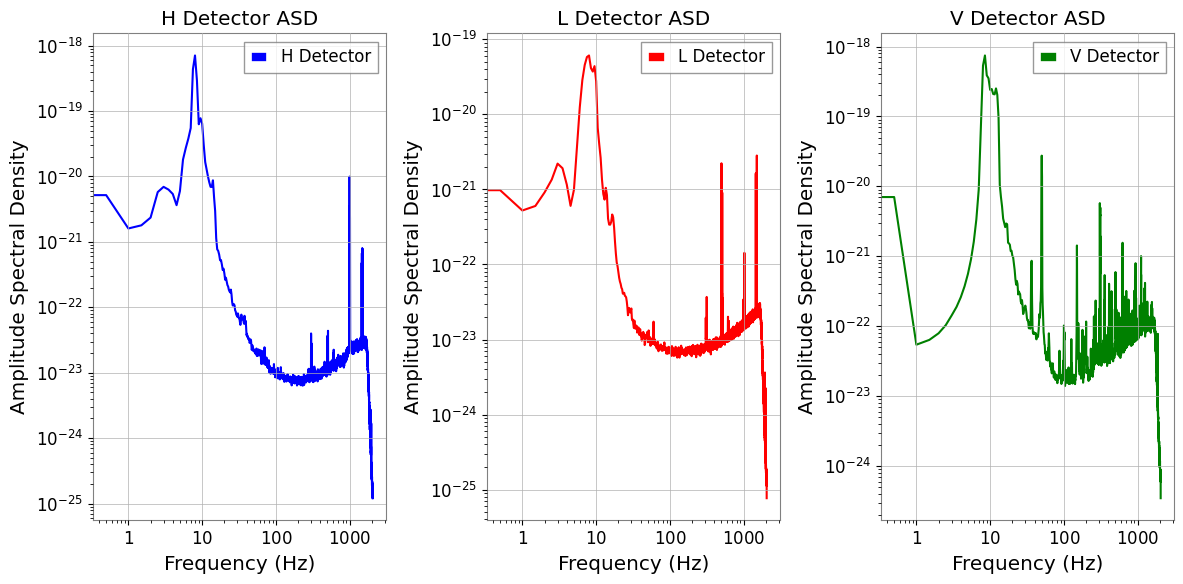

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hasd_2.frequencies.value, hasd_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)

axs[1].loglog(lasd_2.frequencies.value, lasd_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)

axs[2].loglog(vasd_2.frequencies.value, vasd_2.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude Spectral Density')
axs[2].set_title('V Detector ASD')
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()

plt.show()

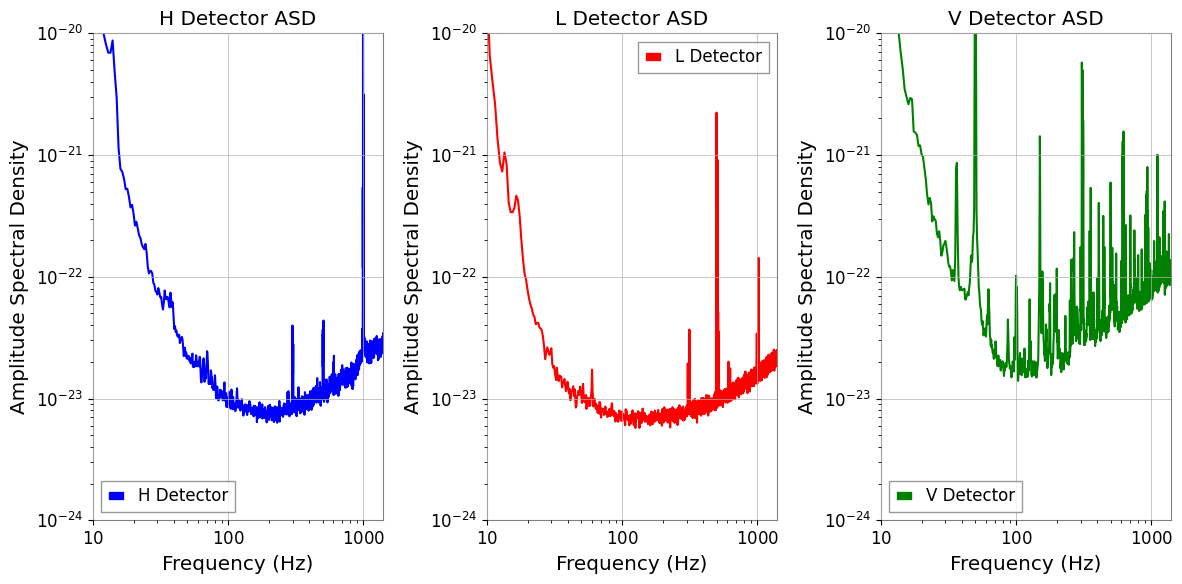

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hasd_2.frequencies.value, hasd_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(10, 1400)
axs[0].set_ylim(1e-24, 1e-20)

axs[1].loglog(lasd_2.frequencies.value, lasd_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(10, 1400)
axs[1].set_ylim(1e-24, 1e-20)

axs[2].loglog(vasd_2.frequencies.value, vasd_2.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude Spectral Density')
axs[2].set_title('V Detector ASD')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim(10, 1400)
axs[2].set_ylim(1e-24, 1e-20)

plt.tight_layout()

plt.show()

In [45]:
hdata_2_2 = TimeSeries.fetch_open_data('H1', int(gps_2)-512, int(gps_2)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]


In [46]:
ldata_2_2 = TimeSeries.fetch_open_data('L1', int(gps_2)-512, int(gps_2)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]


In [47]:
vdata_2_2 = TimeSeries.fetch_open_data('V1', int(gps_2)-512, int(gps_2)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008370 .. 1187009394))
Reading data... [Done]


In [48]:
hasd_2_2 = hdata_2_2.asd(fftlength=4, method="median")
lasd_2_2 = ldata_2_2.asd(fftlength=4, method="median")
vasd_2_2 = vdata_2_2.asd(fftlength=4, method="median")

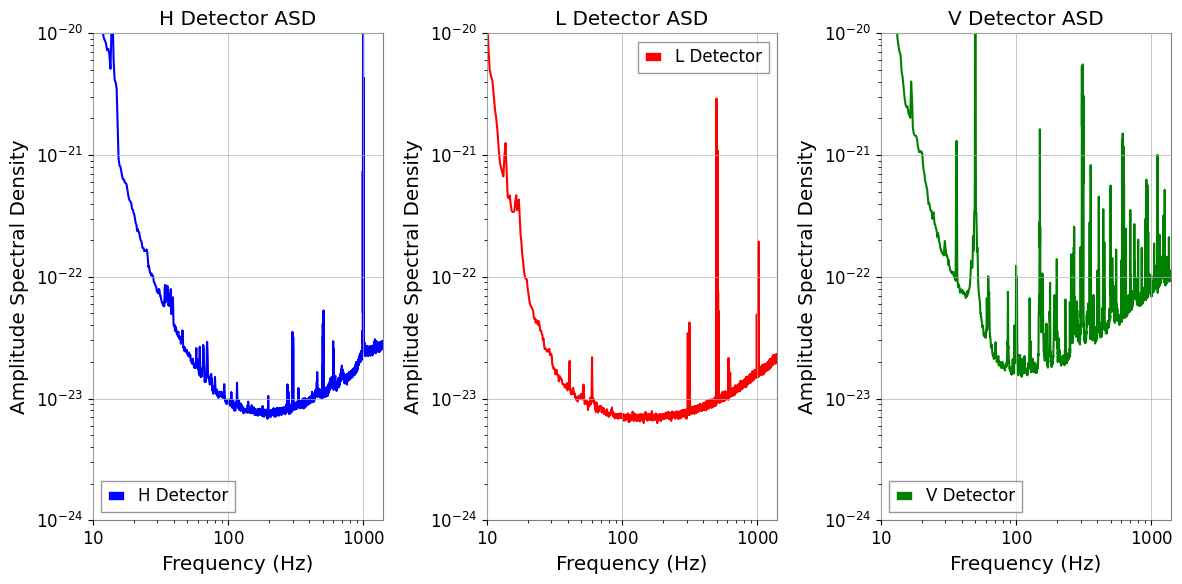

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hasd_2_2.frequencies.value, hasd_2_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(10, 1400)
axs[0].set_ylim(1e-24, 1e-20)

axs[1].loglog(lasd_2_2.frequencies.value, lasd_2_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(10, 1400)
axs[1].set_ylim(1e-24, 1e-20)

axs[2].loglog(vasd_2_2.frequencies.value, vasd_2_2.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude Spectral Density')
axs[2].set_title('V Detector ASD')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim(10, 1400)
axs[2].set_ylim(1e-24, 1e-20)

plt.tight_layout()

plt.show()

In [81]:
segment_new2 = (gps_2-5,gps_2+5)

In [82]:
strain_H2 = TimeSeries.fetch_open_data('H1', *segment_new2, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008877 .. 1187008888))
Reading data... [Done]


In [83]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

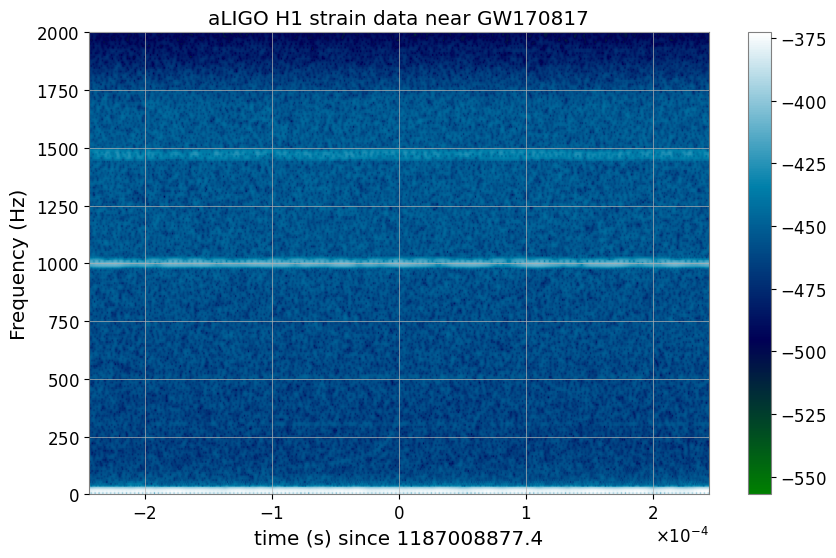

In [84]:
plt.figure(figsize=(10,6))
spec_H, freqs, bins, im = plt.specgram(strain_H2, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_2-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO H1 strain data near GW170817')
plt.show()

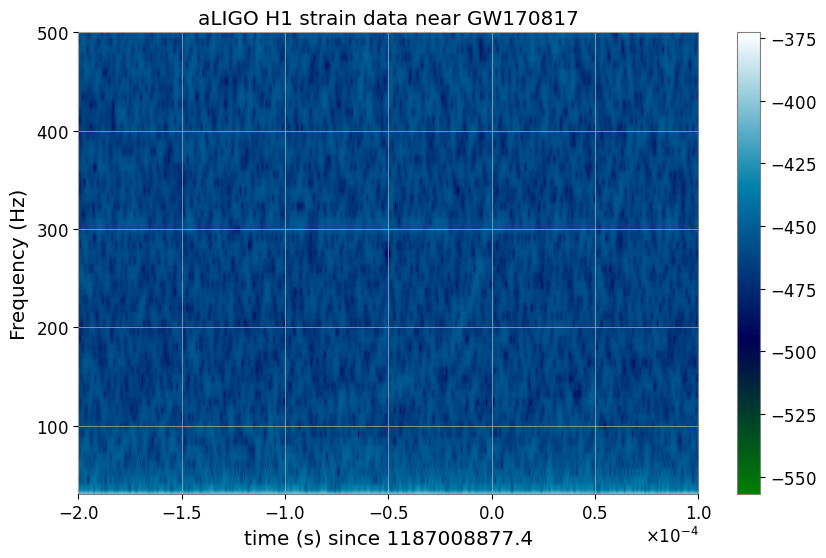

In [100]:
NFFT = int(fs/8.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_H, freqs, bins, im = plt.specgram(strain_H2, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_2-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-2e-4, 1e-4, 30, 500])
plt.title('aLIGO H1 strain data near GW170817')
plt.show()

In [101]:
strain_L2 = TimeSeries.fetch_open_data('L1', *segment_new2, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008877 .. 1187008888))
Reading data... [Done]


In [102]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

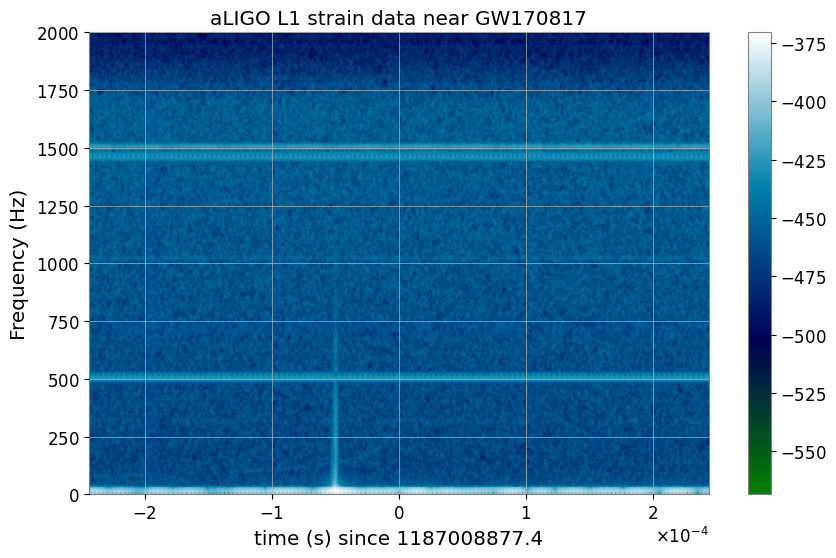

In [103]:
plt.figure(figsize=(10,6))
spec_L, freqs, bins, im = plt.specgram(strain_L2, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_2-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO L1 strain data near GW170817')
plt.show()

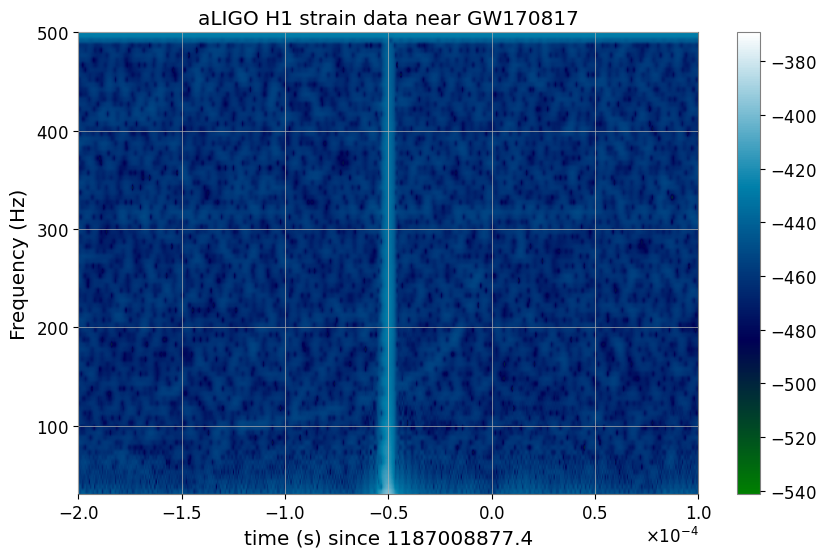

In [112]:
NFFT = int(fs/5.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_L, freqs, bins, im = plt.specgram(strain_L2, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_2-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-2e-4, 1e-4, 30, 500])
plt.title('aLIGO H1 strain data near GW170817')
plt.show()

Инструментален шум кој препокрива дел од сигналот

In [113]:
strain_V2 = TimeSeries.fetch_open_data('V1', *segment_new2, verbose=True)

Fetched 1 URLs from gwosc.org for [1187008877 .. 1187008888))
Reading data... [Done]


In [114]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

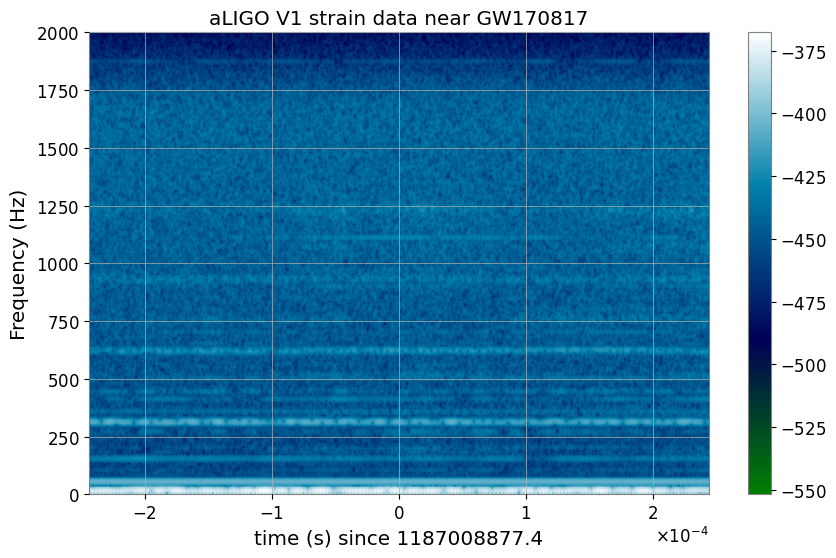

In [115]:
plt.figure(figsize=(10,6))
spec_V, freqs, bins, im = plt.specgram(strain_V2, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_2-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO V1 strain data near GW170817')
plt.show()

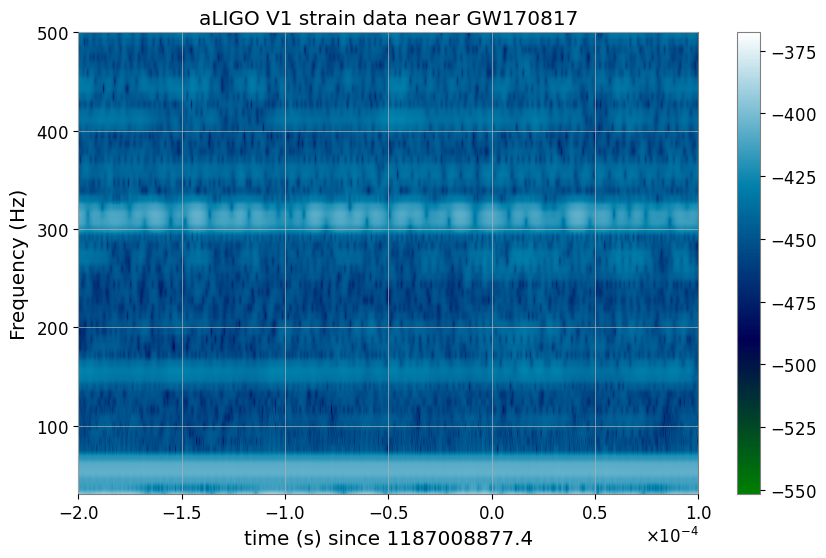

In [119]:
NFFT = int(fs/8.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_V, freqs, bins, im = plt.specgram(strain_V2, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_2-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-2e-4, 1e-4, 30, 500])
plt.title('aLIGO V1 strain data near GW170817')
plt.show()

3. Анализа на GW191219 (NSBH сигнал)

In [50]:
gps_3 = event_gps('GW191219_163120')
print(gps_3)

1260808298.4


In [51]:
segment_3 = (int(gps_3)-50, int(gps_3)+50)
print(segment_3)

(1260808248, 1260808348)


In [52]:
hdata_3 = TimeSeries.fetch_open_data('H1', *segment_3, verbose=True)
print(hdata_3)

Fetched 1 URLs from gwosc.org for [1260808248 .. 1260808348))
Reading data... [Done]
TimeSeries([-1.84165491e-19, -1.85741915e-19, -1.86966419e-19,
            ...,  1.11679698e-19,  1.11916999e-19,
             1.09390083e-19]
           unit: dimensionless,
           t0: 1260808248.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [53]:
ldata_3 = TimeSeries.fetch_open_data('L1', *segment_3, verbose=True)
print(ldata_3)

Fetched 1 URLs from gwosc.org for [1260808248 .. 1260808348))
Reading data... [Done]
TimeSeries([ 3.37590360e-19,  3.67536065e-19,  3.43100668e-19,
            ...,  7.53334382e-20,  2.84599938e-20,
            -1.50335201e-20]
           unit: dimensionless,
           t0: 1260808248.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [54]:
vdata_3 = TimeSeries.fetch_open_data('V1', *segment_3, verbose=True)
print(vdata_3)

Fetched 1 URLs from gwosc.org for [1260808248 .. 1260808348))
Reading data... [Done]
TimeSeries([-8.93388374e-20, -1.32876880e-19, -1.60688720e-19,
            ..., -1.67717952e-19, -1.53629133e-19,
            -1.40072615e-19]
           unit: dimensionless,
           t0: 1260808248.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


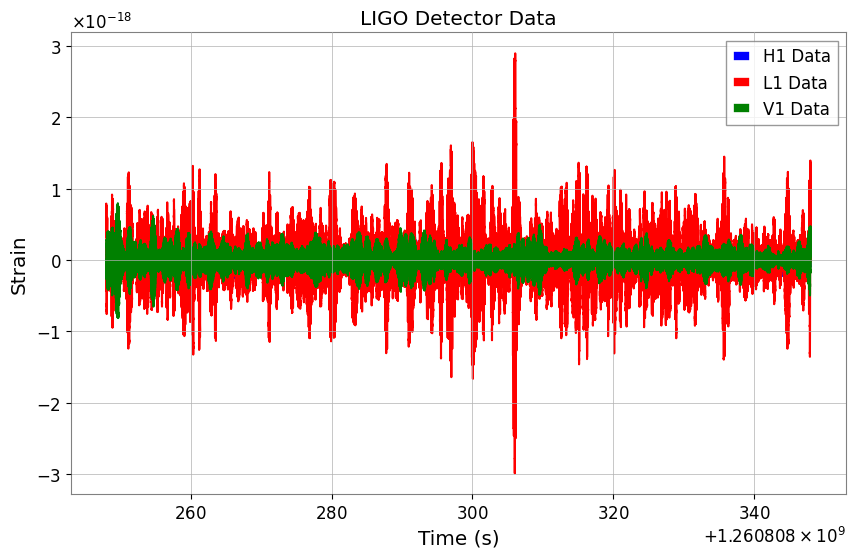

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(hdata_3.times, hdata_3.value, label='H1 Data', color='b')
plt.plot(ldata_3.times, ldata_3.value, label='L1 Data', color='r')
plt.plot(vdata_3.times, vdata_3.value, label='V1 Data', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('LIGO Detector Data')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
hwindow_3 = get_window('hann', hdata_3.size)
hwin_3 = hdata_3 * hwindow_3

In [57]:
hfftamp_3 = hwin_3.fft().abs()

In [58]:
lwindow_3 = get_window('hann', ldata_3.size)
lwin_3 = ldata_3 * lwindow_3

In [59]:
lfftamp_3 = lwin_3.fft().abs()

In [60]:
vwindow_3 = get_window('hann', vdata_3.size)
vwin_3 = vdata_3 * vwindow_3

In [61]:
vfftamp_3 = vwin_3.fft().abs()

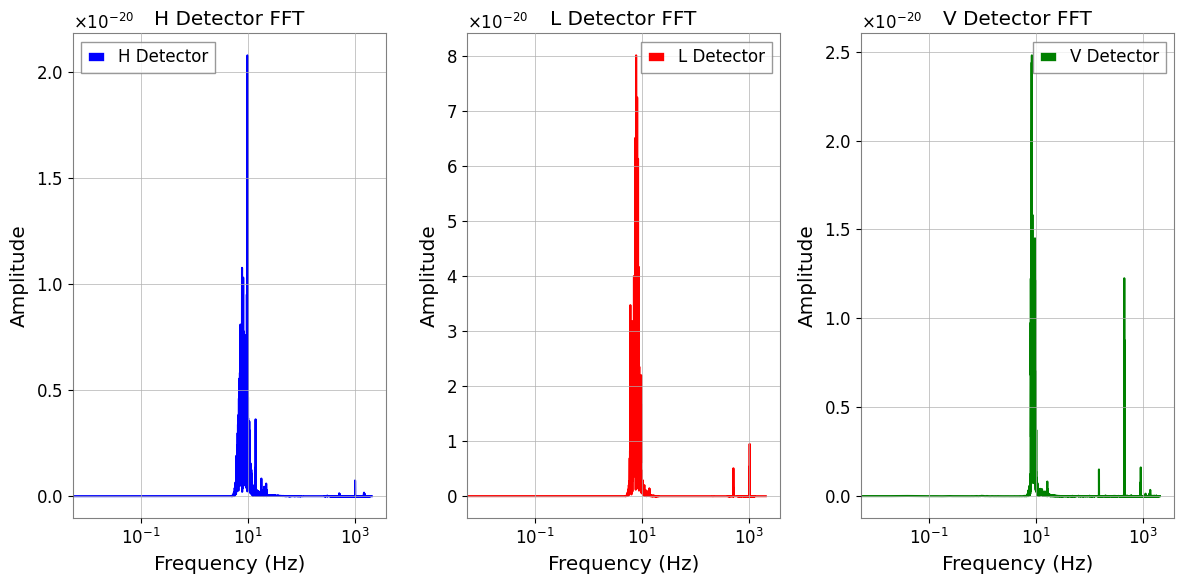

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].semilogx(hfftamp_3.frequencies.value, hfftamp_3.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('H Detector FFT')
axs[0].grid(True)

axs[1].semilogx(lfftamp_3.frequencies.value, lfftamp_3.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('L Detector FFT')
axs[1].grid(True)

axs[2].semilogx(vfftamp_3.frequencies.value, vfftamp_3.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('V Detector FFT')
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()

plt.show()

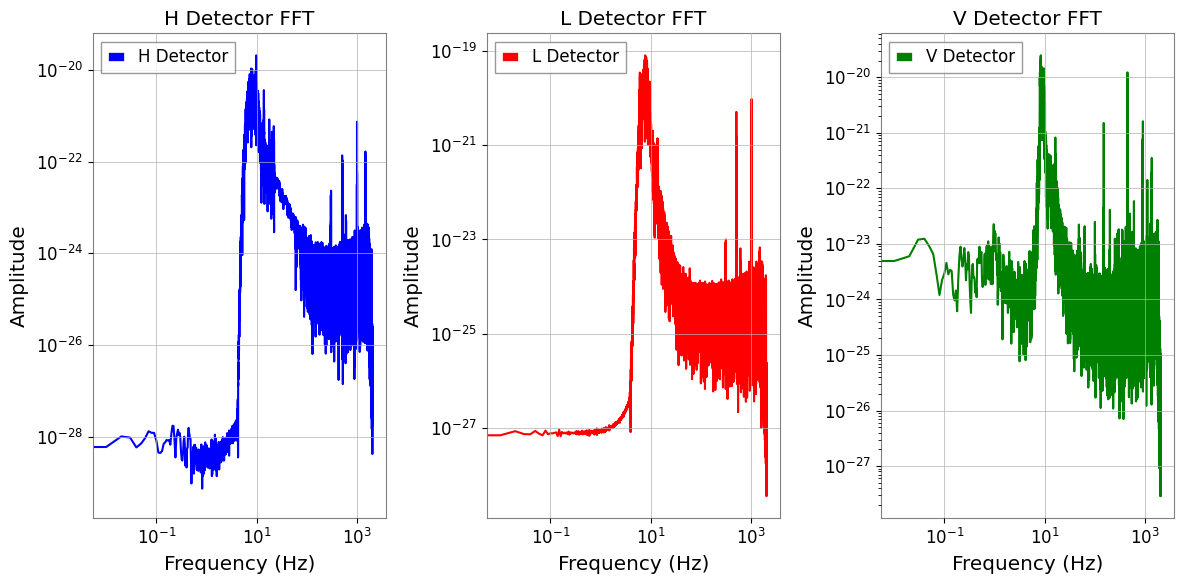

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hfftamp_3.frequencies.value, hfftamp_3.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('H Detector FFT')
axs[0].grid(True)

axs[1].loglog(lfftamp_3.frequencies.value, lfftamp_3.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('L Detector FFT')
axs[1].grid(True)

axs[2].loglog(vfftamp_3.frequencies.value, vfftamp_3.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('V Detector FFT')
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()

plt.show()

In [64]:
hasd_3 = hdata_3.asd(fftlength=2, method="median")
lasd_3 = ldata_3.asd(fftlength=2, method="median")
vasd_3 = vdata_3.asd(fftlength=2, method="median")

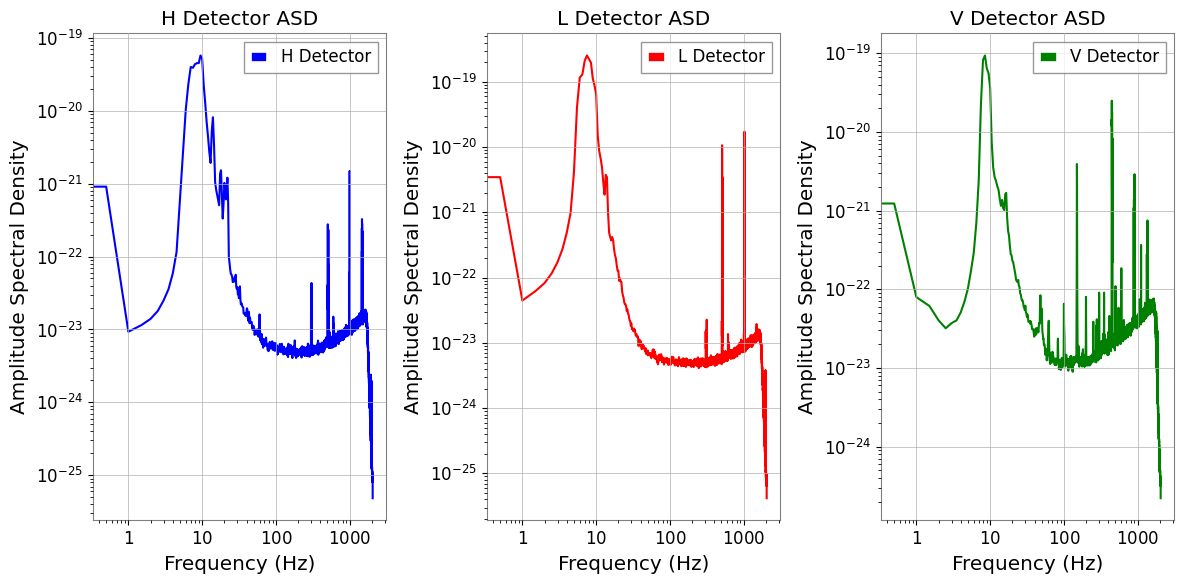

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hasd_3.frequencies.value, hasd_3.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)

axs[1].loglog(lasd_3.frequencies.value, lasd_3.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)

axs[2].loglog(vasd_3.frequencies.value, vasd_3.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude Spectral Density')
axs[2].set_title('V Detector ASD')
axs[2].grid(True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()

plt.show()

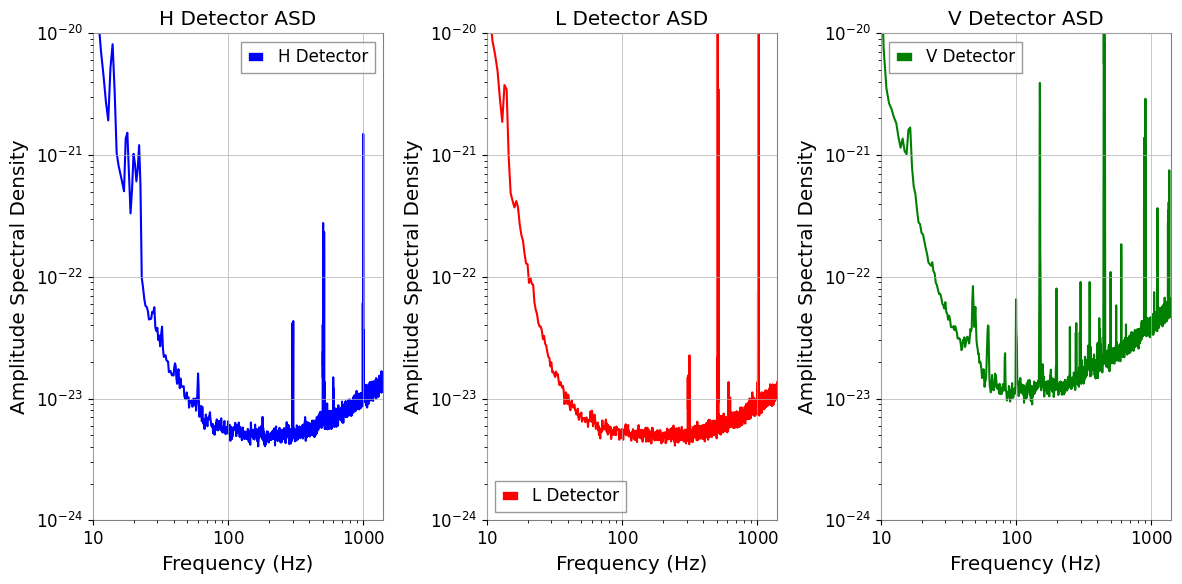

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hasd_3.frequencies.value, hasd_3.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(10, 1400)
axs[0].set_ylim(1e-24, 1e-20)

axs[1].loglog(lasd_3.frequencies.value, lasd_3.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(10, 1400)
axs[1].set_ylim(1e-24, 1e-20)

axs[2].loglog(vasd_3.frequencies.value, vasd_3.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude Spectral Density')
axs[2].set_title('V Detector ASD')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim(10, 1400)
axs[2].set_ylim(1e-24, 1e-20)

plt.tight_layout()

plt.show()

In [67]:
hdata_3_2 = TimeSeries.fetch_open_data('H1', int(gps_3)-512, int(gps_3)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1260807786 .. 1260808810))
Reading data... [Done]


In [68]:
ldata_3_2 = TimeSeries.fetch_open_data('L1', int(gps_3)-512, int(gps_3)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1260807786 .. 1260808810))
Reading data... [Done]


In [69]:
vdata_3_2 = TimeSeries.fetch_open_data('V1', int(gps_3)-512, int(gps_3)+512, verbose=True)

Fetched 1 URLs from gwosc.org for [1260807786 .. 1260808810))
Reading data... [Done]


In [70]:
hasd_3_2 = hdata_3_2.asd(fftlength=4, method="median")
lasd_3_2 = ldata_3_2.asd(fftlength=4, method="median")
vasd_3_2 = vdata_3_2.asd(fftlength=4, method="median")

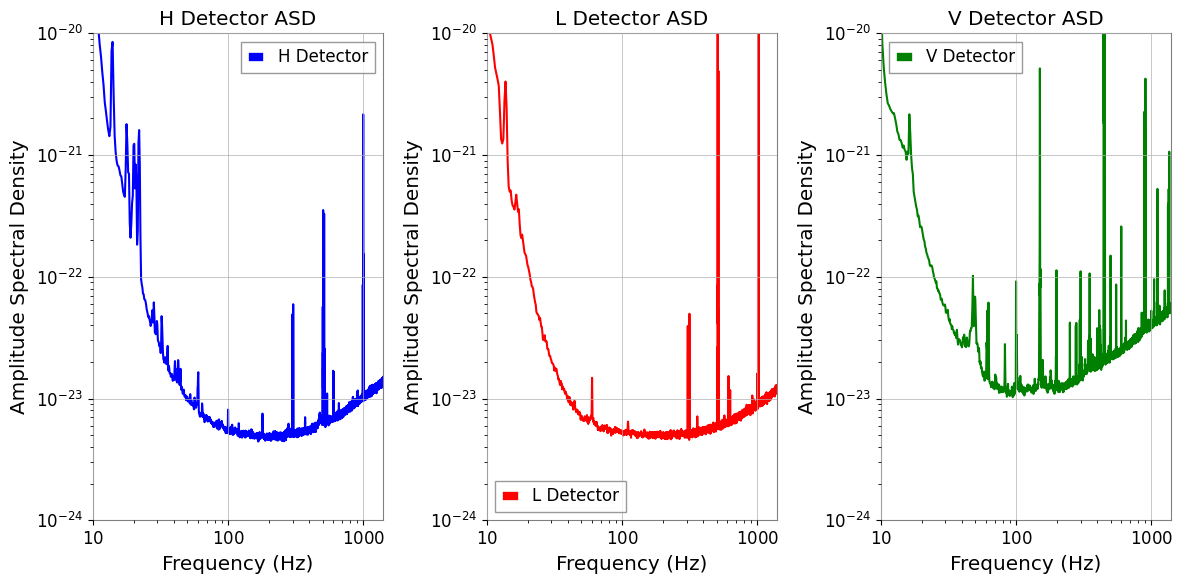

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].loglog(hasd_3_2.frequencies.value, hasd_3_2.value, color='blue', label='H Detector')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude Spectral Density')
axs[0].set_title('H Detector ASD')
axs[0].grid(True)
axs[0].legend()
axs[0].set_xlim(10, 1400)
axs[0].set_ylim(1e-24, 1e-20)

axs[1].loglog(lasd_3_2.frequencies.value, lasd_3_2.value, color='red', label='L Detector')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude Spectral Density')
axs[1].set_title('L Detector ASD')
axs[1].grid(True)
axs[1].legend()
axs[1].set_xlim(10, 1400)
axs[1].set_ylim(1e-24, 1e-20)

axs[2].loglog(vasd_3_2.frequencies.value, vasd_3_2.value, color='green', label='V Detector')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Amplitude Spectral Density')
axs[2].set_title('V Detector ASD')
axs[2].grid(True)
axs[2].legend()
axs[2].set_xlim(10, 1400)
axs[2].set_ylim(1e-24, 1e-20)

plt.tight_layout()

plt.show()

In [120]:
segment_new3 = (gps_3-5,gps_3+5)

In [121]:
strain_H3 = TimeSeries.fetch_open_data('H1', *segment_new3, verbose=True)

Fetched 1 URLs from gwosc.org for [1260808293 .. 1260808304))
Reading data... [Done]


In [122]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

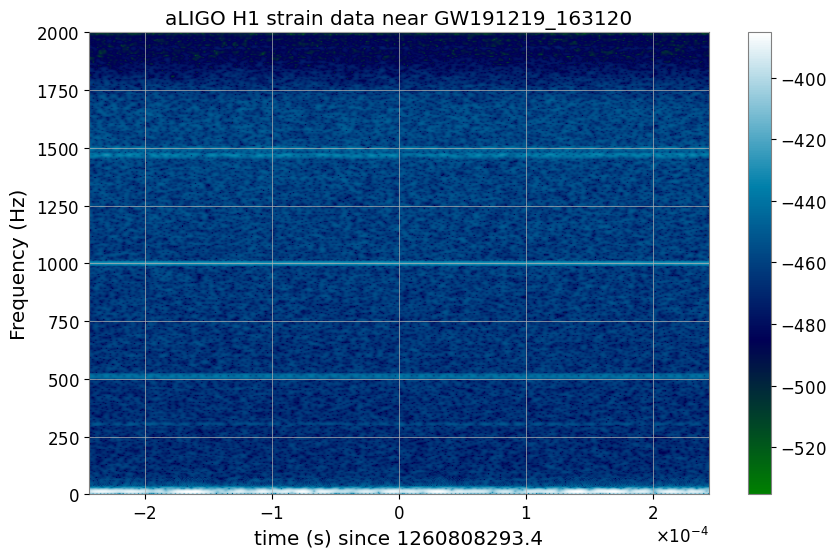

In [131]:
plt.figure(figsize=(10,6))
spec_H, freqs, bins, im = plt.specgram(strain_H3, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_3-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO H1 strain data near GW191219_163120')
plt.show()

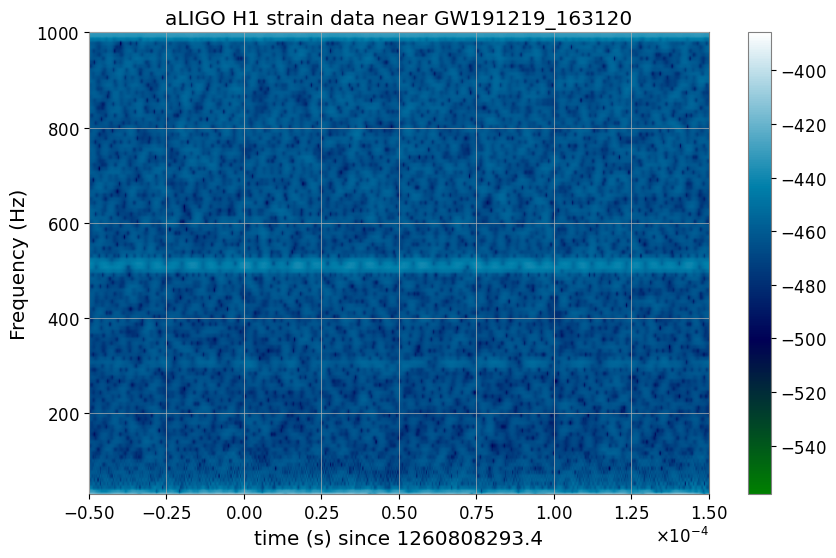

In [143]:
NFFT = int(fs/8.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_H, freqs, bins, im = plt.specgram(strain_H3, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_3-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5e-4, 1.5e-4, 30, 1000])
plt.title('aLIGO H1 strain data near GW191219_163120')
plt.show()

In [140]:
strain_L3 = TimeSeries.fetch_open_data('L1', *segment_new3, verbose=True)

Fetched 1 URLs from gwosc.org for [1260808293 .. 1260808304))
Reading data... [Done]


In [141]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

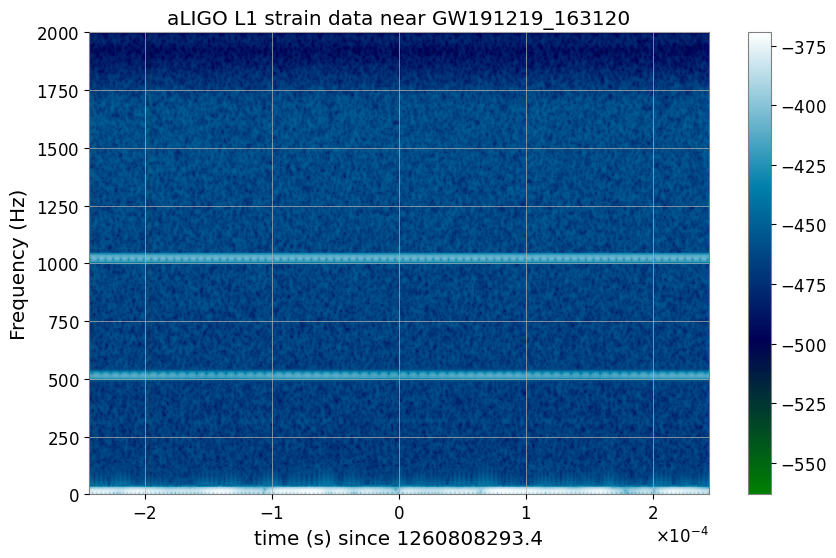

In [147]:
plt.figure(figsize=(10,6))
spec_L, freqs, bins, im = plt.specgram(strain_L3, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_3-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO L1 strain data near GW191219_163120')
plt.show()

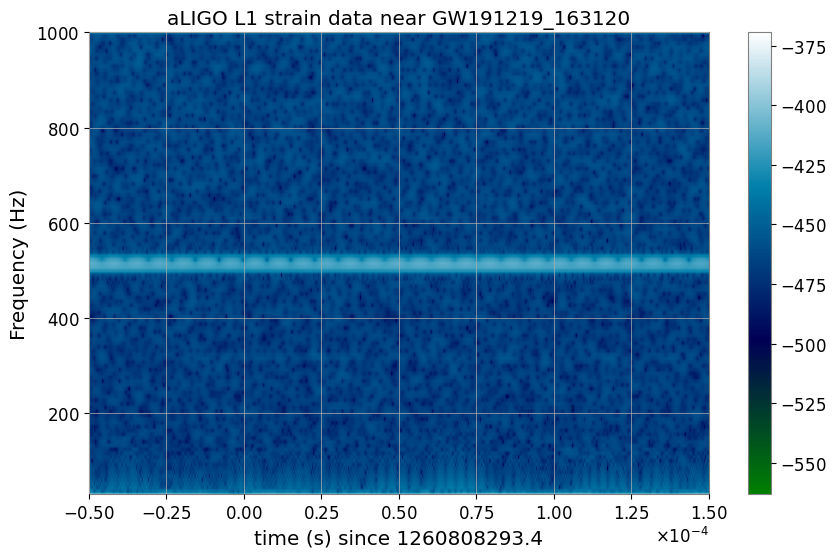

In [148]:
NFFT = int(fs/8.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_L, freqs, bins, im = plt.specgram(strain_L3, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_3-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5e-4, 1.5e-4, 30, 1000])
plt.title('aLIGO L1 strain data near GW191219_163120')
plt.show()

In [145]:
strain_V3 = TimeSeries.fetch_open_data('V1', *segment_new3, verbose=True)

Fetched 1 URLs from gwosc.org for [1260808293 .. 1260808304))
Reading data... [Done]


In [146]:
NFFT = int(fs/8)
NOVL = int(NFFT*15./16)
window = np.blackman(NFFT)
spec_cmap = 'ocean'

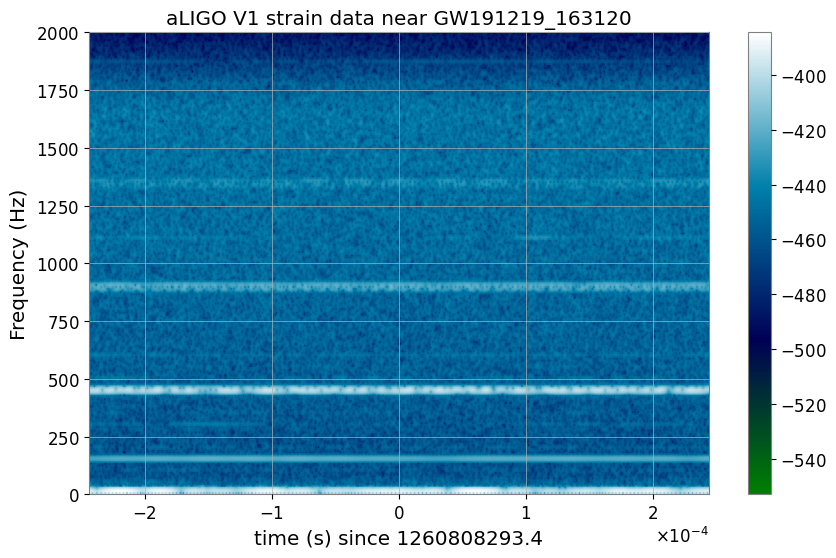

In [149]:
plt.figure(figsize=(10,6))
spec_V, freqs, bins, im = plt.specgram(strain_V3, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_3-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-deltat, deltat, 0, 2000])
plt.title('aLIGO V1 strain data near GW191219_163120')
plt.show()

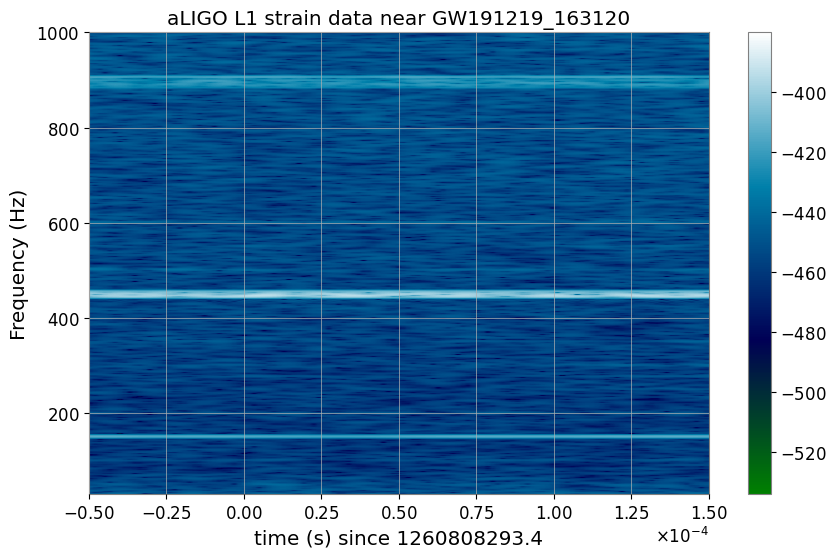

In [155]:
NFFT = int(fs/2.0)
NOVL = int(NFFT*15/16.0)
window = np.blackman(NFFT)
plt.figure(figsize=(10,6))
spec_V, freqs, bins, im = plt.specgram(strain_V3, NFFT=NFFT, Fs=fs, window=window, noverlap=NOVL, cmap=spec_cmap, xextent=[-deltat, deltat])
plt.xlabel('time (s) since '+str(gps_3-5))
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.axis([-0.5e-4, 1.5e-4, 30, 1000])
plt.title('aLIGO L1 strain data near GW191219_163120')
plt.show()